In [50]:
import sys 
sys.path.append('../utils')
import importlib

import eda_utils as utils
importlib.reload(utils)
import pandas as pd

In [45]:
folder_path = r"E:\fecom-ecom-realtime-recommendation\data\raw"
dfs_org = utils.read_multiple_csv_from_folder(folder_path)

File Customer_List loaded!


e:\fecom-ecom-realtime-recommendation\processing\../utils\eda_utils.py:29: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[file_name] = pd.read_csv(path, sep = ";")


File Geolocations loaded!
File Order_Items loaded!
File Order_Payments loaded!
File Orders loaded!
File Products loaded!
File Sellers_List loaded!
File Order_Reviews_No_Emojis loaded!


In [46]:
dfs_org.keys()

dict_keys(['Customer_List', 'Geolocations', 'Order_Items', 'Order_Payments', 'Orders', 'Products', 'Sellers_List', 'Order_Reviews_No_Emojis'])

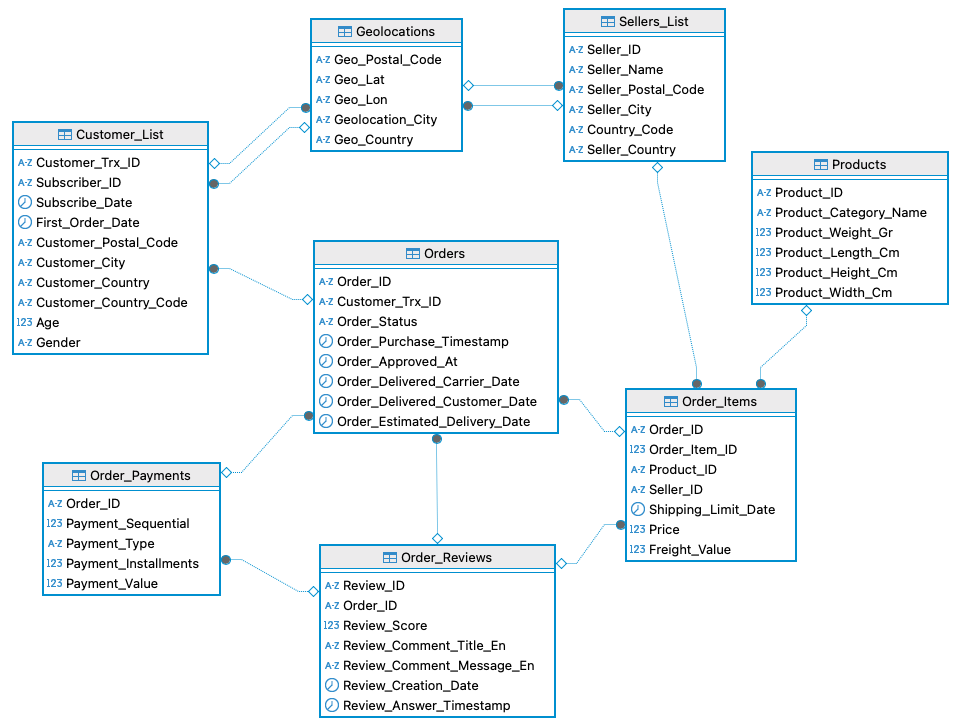

# I. Customer List

In [47]:
df_cus_ls = dfs_org["Customer_List"]
csv_path = r"E:\fecom-ecom-realtime-recommendation\data\raw\Customer_List.csv"

quick_check = utils.quick_overview_data(df_cus_ls, csv_path)
quick_check

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:02<00:00,  4.51it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

{'file_name': 'Customer_List',
 'shape': (102727, 10),
 'columns': ['Customer_Trx_ID',
  'Subscriber_ID',
  'Subscribe_Date',
  'First_Order_Date',
  'Customer_Postal_Code',
  'Customer_City',
  'Customer_Country',
  'Customer_Country_Code',
  'Age',
  'Gender'],
 'dtypes': {'Customer_Trx_ID': dtype('O'),
  'Subscriber_ID': dtype('O'),
  'Subscribe_Date': dtype('O'),
  'First_Order_Date': dtype('O'),
  'Customer_Postal_Code': dtype('O'),
  'Customer_City': dtype('O'),
  'Customer_Country': dtype('O'),
  'Customer_Country_Code': dtype('O'),
  'Age': dtype('int64'),
  'Gender': dtype('O')}}

In [ ]:
# From previous EDA, we know that the Customer_List.csv has 2 columns: Customer_Trx_ID and First_Order_Date, which have null value
columns_to_check = ['Customer_Trx_ID', 'First_Order_Date']

check_null_overlap = utils.check_null_overlap(df_cus_ls, columns_to_check)
check_null_overlap

🔍 Null Count per Column:
 - Customer_Trx_ID: 3286 nulls
 - First_Order_Date: 3286 nulls

📊 Checking if nulls occur in the same rows:
[V] All columns have nulls in the same rows.


In [53]:
# So if both columns are NULL, it very likely means:
# 🟡 This customer has not placed any orders yet.

df_cus_ls["Customer_Trx_ID"] = df_cus_ls["Customer_Trx_ID"].fillna("No Order")
df_cus_ls["First_Order_Date"] = df_cus_ls["First_Order_Date"].fillna("2099-12-31")

In [54]:
# From previous EDA, we know that the Customer_List.csv has 2 columns: Customer_Trx_ID and First_Order_Date, which have null value
columns_to_check = ['Customer_Trx_ID', 'First_Order_Date']

check_null_overlap = utils.check_null_overlap(df_cus_ls, columns_to_check)
check_null_overlap

🔍 Null Count per Column:
 - Customer_Trx_ID: 0 nulls
 - First_Order_Date: 0 nulls

📊 Checking if nulls occur in the same rows:
[V] All columns have nulls in the same rows.


In [ ]:
# Investigate  why these customers still havent purchased anything
# 1. Checking how long have they been register for

# 2. Check their age, country, gender. 

# II. Geolocations

In [42]:
df_cus_ls = dfs_org["Customer_List"]
csv_path = r"E:\fecom-ecom-realtime-recommendation\data\raw\Customer_List.csv"

quick_check = utils.quick_overview_data(df_cus_ls, csv_path)
quick_check

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:02<?, ?it/s]


KeyboardInterrupt: 

# III. Order Items

# IV. Order Payments

# V. Order Payments

# VI. Products

# VII. Sellers List

# VIII. Order_Reviews_No_Emojis